В ходе данного проекта будет проведена приоритизация гипотез и анализ результатов А/В-теста относительно среднего количества заказов и среднего чека заказа.

In [ ]:
# вызовем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

## Приоритизация гипотез

### Выгрузка данных

In [ ]:
# сохраним данные о гипотезах в датафрейм hypothesis
hypothesis = pd.read_csv('hypothesis.csv')

# выведем датафрейм hypothesis на экран
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
# переименуем столбцы датафрейма hypothesis, приведя их к нижнему регистру
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

### Приоритизация гипотез по фреймворку ICE

In [ ]:
# добавим в датафрейм hypothesis столбец ice_score со значением приоритета по фреймворку ICE
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']), 2)
# отсортируем гипотезы по убыванию приоритета
hypothesis.sort_values(by='ice_score', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритизация гипотез по фреймворку RICE

In [ ]:
# добавим в датафрейм hypothesis столбец rice_score со значением приоритета по фреймворку RICE
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# отсортируем гипотезы по убыванию приоритета по RICE
hypothesis.sort_values(by='rice_score', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Применение фреймворка ICE дало наибольший приоритет гипотезам:

* "Запустить акцию, дающую скидку на товар в день рождения";
* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применение фреймворка RICE дало наибольший приоритет гипотезам:

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
* "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа";
* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

Изменение приоритизации гипотез при применении RICE связано с тем, что этот фреймворк учитывает параметр *Reach*, который не учитывается фреймворком ICE. Поэтому гипотезы, имеющие высокие показатели *Impact*, *Confidence* и *Efforts*, но низкий *Reach*, получили более низкие баллы при применении RICE, чем при применении ICE.

## Анализ A/B-теста

### Выгрузка данных

In [ ]:
# сохраним данные о заказах в датафрейм orders
orders = pd.read_csv('orders.csv')
# выведем первые строки orders на экран
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# приведём названия столбцов orders в соответствие с правилами стиля
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
# выведем первые строки orders на экран
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# проверим типы данных в orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# изменим тип данных в столбце date
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
# сохраним данные о количестве посетителей в датафрейм visitors
visitors = pd.read_csv('visitors.csv')
# выведем первые строки visitors на экран
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# проверим типы данных в visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# изменим тип данных в столбце date
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Кумулятивная выручка по группам

#### Подготовка данных

In [ ]:
# сохраним уникальные пары дат и групп теста в переменной date_group
date_group = orders[['date','group']].drop_duplicates()

# сохраним агрегированные кумулятивные данные о заказах по дням в переменной orders_agg
orders_agg = (date_group
              .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                     .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique',
                           'visitor_id': 'nunique', 'revenue': 'sum'}), axis=1)
              .sort_values(by=['date', 'group']))

# сохраним агрегированные кумулятивные данные о посетителях по дням в переменной visitors_agg
visitors_agg = (date_group
                .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                       .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)
                .sort_values(by=['date', 'group']))

# объединим кумулятивные данные о заказах и о посетителях в таблице data_cumulat
data_cumulat = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
# присвоим столбцам data_cumulat названия
data_cumulat.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем первые строки data_cumulat на экран
data_cumulat.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Построение графика

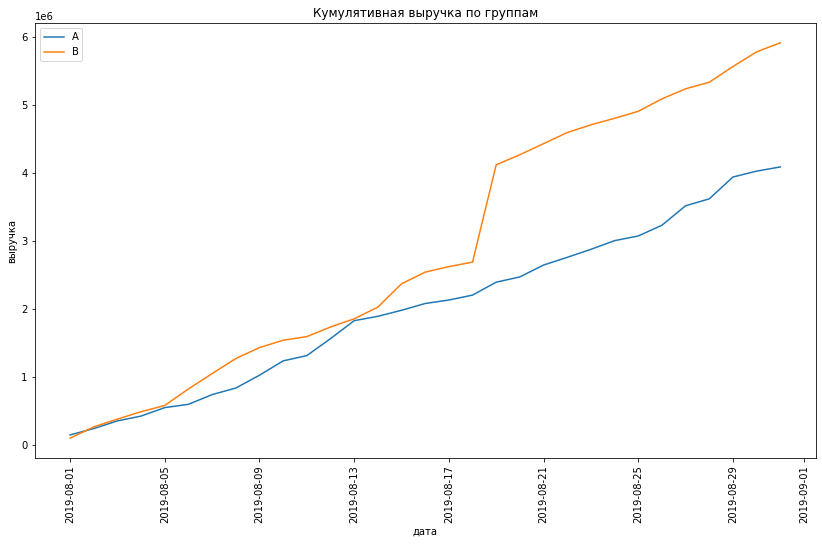

In [ ]:
# разделим данные о результатах теста для разных групп на два датафрейма
cumulat_a = data_cumulat[data_cumulat['group']=='A'] # результаты теста для группы A
cumulat_b = data_cumulat[data_cumulat['group']=='B'] # результаты теста для группы B

# зададим размер поля графика
plt.figure(figsize=(14, 8))

# построим графики кумулятивной выручки для групп
plt.plot(cumulat_a['date'], cumulat_a['revenue'], label='A') # график для группы А
plt.plot(cumulat_b['date'], cumulat_b['revenue'], label='B') # график для группы B

plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Из графика видно, что кумулятивная выручка группы В на протяжении всего теста выше, чем в группе А. Это может свидетельствовать о том, что **внедрённые изменения положительно сказались на выручке**.

### Кумулятивный средний чек по группам

#### График кумулятивного среднего чека по группам

/tmp/ipykernel_151/3561854592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulat_a['avg_sum'] = cumulat_a['revenue'] / cumulat_a['orders']
/tmp/ipykernel_151/3561854592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulat_b['avg_sum'] = cumulat_b['revenue'] / cumulat_b['orders']


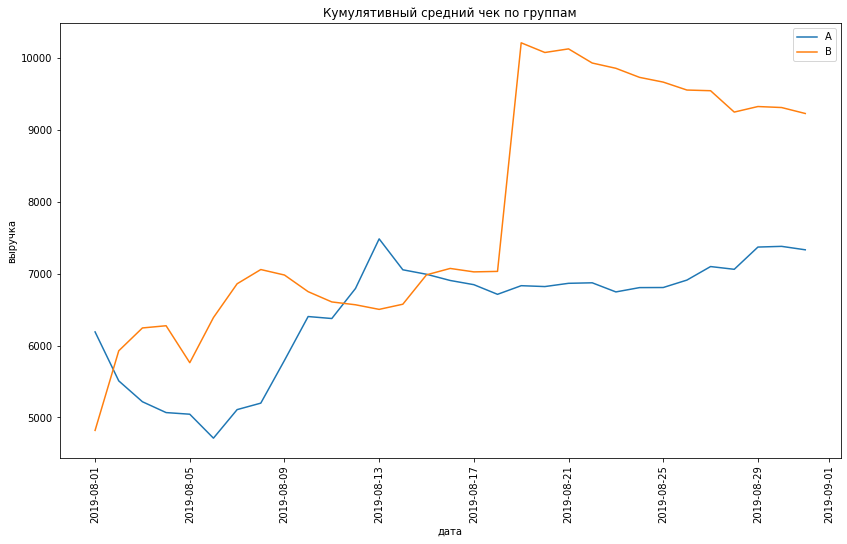

In [ ]:
# добавим в датафреймы с результатами теста по группам столбец avg_sum со значением среднего чека,
# для этого разделим сумму выручки на количество заказов
cumulat_a['avg_sum'] = cumulat_a['revenue'] / cumulat_a['orders']
cumulat_b['avg_sum'] = cumulat_b['revenue'] / cumulat_b['orders']

# зададим размер поля графика
plt.figure(figsize=(14, 8))

# построим графики кумулятивного среднего чека для групп
plt.plot(cumulat_a['date'], cumulat_a['avg_sum'], label='A') # график для группы А
plt.plot(cumulat_b['date'], cumulat_b['avg_sum'], label='B') # график для группы В

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Из графика видно, что кумулятивный средний чек нестабилен. Как правило, в группе В этот показатель выше, однкао в некоторые моменты он ниже, чем в группе А. Кроме того, в среднем чеке группы В наблюдается резкий скачок, что может говорить о наличии аномальных значений.

Также следует отметить, что, начиная с 18 августа средний чек группы В снижается, а группы А - растёт.

#### График относительного изменения кумулятивного среднего чека

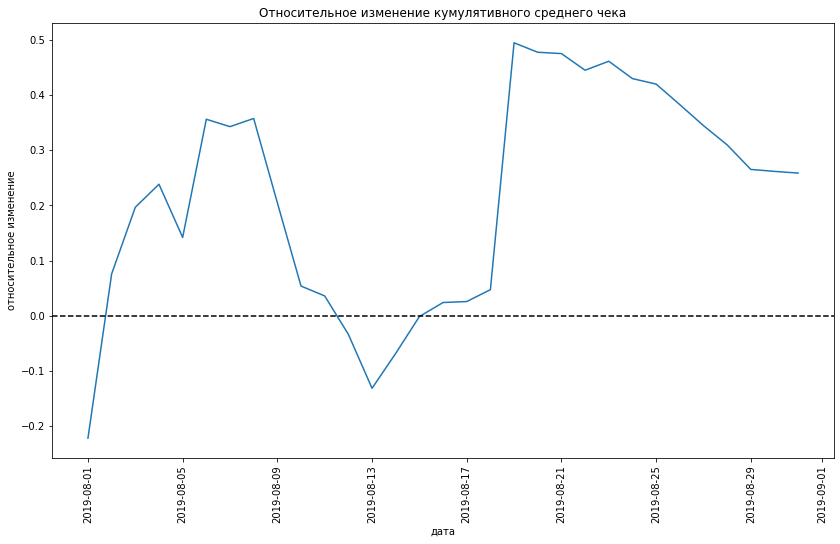

In [ ]:
# объединим датафреймы с результатами теста по группам в датафрейм cumulat_merged
cumulat_merged = cumulat_a.merge(cumulat_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# зададим размер поля графика
plt.figure(figsize=(14, 8))

# построим график относительного изменения кумулятивного среднего чека группы В относительно группы А
plt.plot(cumulat_merged['date'], (cumulat_merged['avg_sum_b']/cumulat_merged['avg_sum_a']-1))

plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Из графика видно, что относительное изменение среднего чека постоянно сильно колеблется, что может свидетельствовать о наличии аномальных значений.

### Кумулятивное среднее количество заказов на посетителя по группам

#### График кумулятивного среднего количества заказов на посетителя по группам

/tmp/ipykernel_151/3586474048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulat_a['conversion'] = cumulat_a['orders'] / cumulat_a['visitors']
/tmp/ipykernel_151/3586474048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulat_b['conversion'] = cumulat_b['orders'] / cumulat_b['visitors']


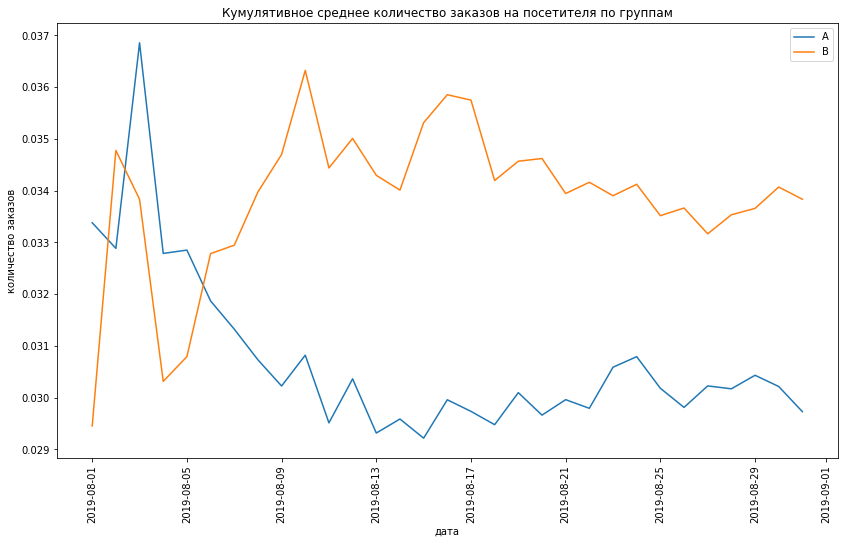

In [ ]:
# добавим в датафреймы с результатами теста по группам столбец conversion со средним количеством заказов на посетителя,
# для этого разделим количество заказов на количество посетителей
cumulat_a['conversion'] = cumulat_a['orders'] / cumulat_a['visitors']
cumulat_b['conversion'] = cumulat_b['orders'] / cumulat_b['visitors']

# зададим размер поля графика
plt.figure(figsize=(14, 8))

# построим графики кумулятивного среднего количества заказов на посетителя для групп
plt.plot(cumulat_a['date'], cumulat_a['conversion'], label='A') # график для группы А
plt.plot(cumulat_b['date'], cumulat_b['conversion'], label='B') # график для группы B

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('количество заказов')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Из графика видно, что кумулятивное среднее количество заказов на посетителя не стабилизировалось и в целом снижается для обеих групп.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя

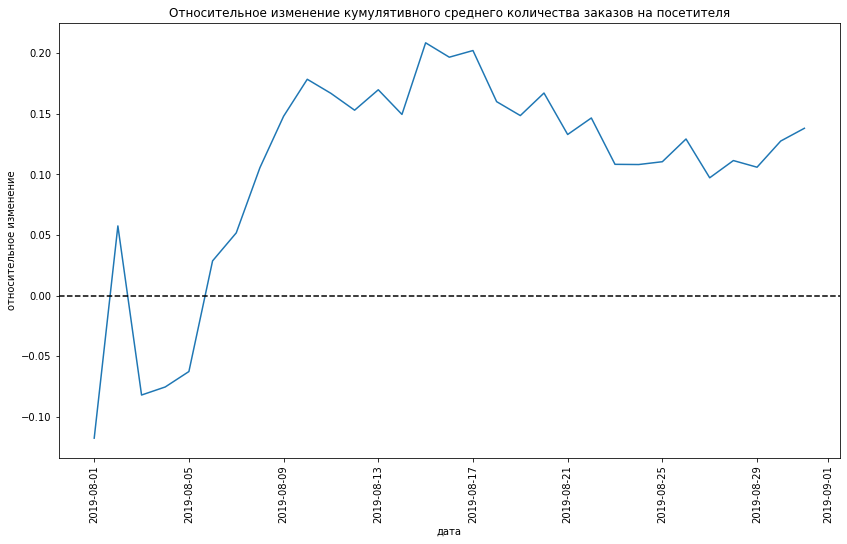

In [ ]:
# объединим датафреймы с результатами теста по группам в датафрейм cumulat_merged
cumulat_merged = cumulat_a.merge(cumulat_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# зададим размер поля графика
plt.figure(figsize=(14, 8))

# построим график относительного изменения кумулятивного среднего количества заказов на посетителя
# группы В относительно группы А
plt.plot(cumulat_merged['date'], (cumulat_merged['conversion_b']/cumulat_merged['conversion_a']-1))

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Из графика видно, что относительное изменение кумулятивного среднего количества заказов на посетителя колеблется, имеет резкий скачок, однако в целом растёт.

### Количество заказов по пользователям

#### Данные о количестве заказов по пользователям

In [ ]:
# создадим датафрейм orders_by_users с данными о количестве заказов на пользователя
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
# дадим названия столбцам orders_by_users
orders_by_users.columns = ['user_id', 'orders_amount']

#### Диаграмма рассеяния количества заказов по пользователям

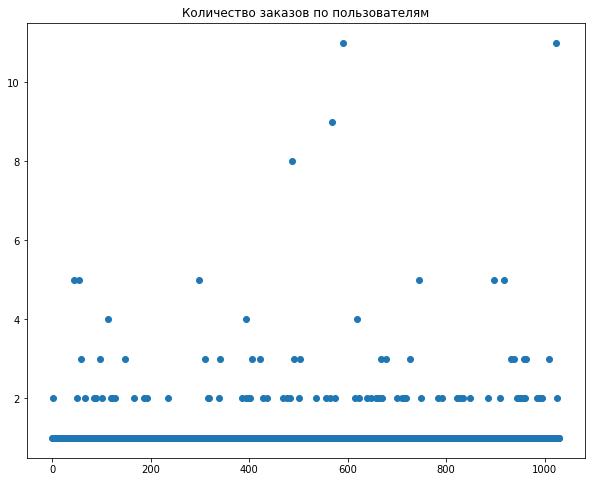

In [ ]:
# построим диаграмму рассеяния количества заказов на пользователя
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(10, 8))
plt.scatter(x_values, orders_by_users['orders_amount'])

plt.title('Количество заказов по пользователям')
plt.show()

Из диаграммы видно, что подавляющее большинство посетителей совершили 1 заказ; число посетителей, совершивших более 2 заказов, крайне мало.

#### Перцентили количества заказов по пользователям

In [ ]:
# посчитаем 95 и 99 перцентили количества заказов на пользователя
np.percentile(orders_by_users['orders_amount'], [95, 99])

array([2., 4.])

5% посетителей совершили более 2 заказов, и лишь 1% - более 4. Таким образом, аномальными следует считать посетителей, совершивших более 2 заказов.

### Стоимость заказов по пользователям

#### Диаграмма рассеяния стоимости заказов по пользователям

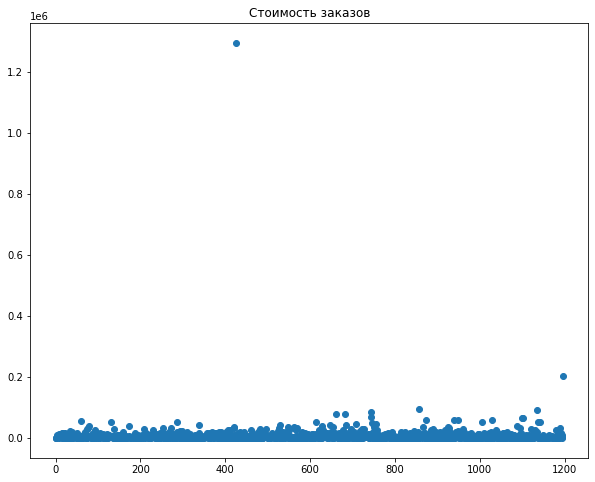

In [ ]:
# построим диаграмму рассеяния стоимости заказов на пользователя
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 8))
plt.scatter(x_values, orders['revenue'])

plt.title('Стоимость заказов')
plt.show()

Из диаграммы видно, что почти все посетители совершали заказы стоимостью менее 20 тысяч.

#### Перцентили стоимости заказов по пользователям

In [ ]:
# посчитаем 95 и 99 перцентили стоимости заказов по пользователям
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% посетителей совершали заказы стоимостью более 28000, и лишь 1% - более 58233. Таким образом, аномальными следует считать посетителей, совершавших заказы на сумму более 28000.

### Статистическая значимость различий в показателях между группами по «сырым» данным

#### Статистическая значимость различий в среднем количестве заказов на посетителя

**Гипотеза Н0:** Различий в среднем количестве заказов на посетителя между группами нет.

**Гипотеза Н1:** Между группами есть различия в среднем количестве заказов на посетителя.

In [ ]:
# создадим датафрейм с данными о количестве заказов по пользователям в группе А
orders_by_users_a = (orders[orders['group'] == 'A']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_a.columns = ['user_id', 'orders_amount']

# создадим датафрейм с данными о количестве заказов по пользователям в группе В
orders_by_users_b = (orders[orders['group'] == 'B']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_b.columns = ['user_id', 'orders_amount']

# создадим датафреймы с данными о количестве посетителей по дням для групп
visitors_per_date_a = visitors[visitors['group']=='A'][['date','visitors']] # для группы А
visitors_per_date_b = visitors[visitors['group']=='B'][['date','visitors']] # для группы В

# создадим датафрейм с количеством заказов на пользователя в группе А
sample_a = pd.concat([orders_by_users_a['orders_amount'],
                      pd.Series(0, index=np.arange(visitors_per_date_a['visitors'].sum() -
                                                   len(orders_by_users_a['orders_amount'])),
                                name='orders')], axis=0)

# создадим датафрейм с количеством заказов на пользователя в группе В
sample_b = pd.concat([orders_by_users_b['orders_amount'],
                      pd.Series(0, index=np.arange(visitors_per_date_b['visitors'].sum() -
                                                   len(orders_by_users_b['orders_amount'])),
                                name='orders')], axis=0)

# найдём статистическую значимость различий с помощью теста Манна - Уитни
display("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# найдём относительный прирост среднего числа заказов
"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1)

'0.017'

'0.138'

Полученная статистическая значимость меньше уровня значимости 0.05, значит, различия в среднем количестве заказов на посетителя между группами есть.

Относительный прирост среднего количества заказов группы В составляет 13.8%.

#### Статистическая значимость различий в среднем чеке заказа

**Гипотеза Н0:** Различий в среднем чеке заказа между группами нет.

**Гипотеза Н1:** Между группами есть различия в среднем чеке заказа.

In [ ]:
# найдём статистическую значимость различий с помощью теста Манна - Уитни
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                            orders[orders['group']=='B']['revenue'])[1]))

# найдём относительный прирост среднего чека заказа
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1)

'0.729'

'0.259'

Полученная статистическая значимость больше уровня значимости 0.05, значит, различий в среднем чеке заказа между группами нет.

При этом относительный прирост среднего чека заказа группы В составляет 25.9%.

### Статистическая значимость различий в показателях между группами по «очищенным» данным

#### Отбор аномальных значений

Отберём идентификаторы пользователей, сделавших более 2 заказов, и пользователей, сделавших заказы на сумму более 28000.

In [ ]:
# сохраним id пользователей с аномально большим количеством заказов
too_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders_amount'] > 2]['user_id'],
                             orders_by_users_b[orders_by_users_b['orders_amount'] > 2]['user_id']], axis=0)

# сохраним id пользователей с аномально дорогими заказами
too_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
too_expensive_orders.columns = ['user_id']

# объединим данные об "аномальных" пользователях
abnormal_users = (pd.concat([too_many_orders, too_expensive_orders], axis=0).drop_duplicates().sort_values())

#### Статистическая значимость различий в среднем количестве заказов на посетителя

**Гипотеза Н0:** Различий в среднем количестве заказов на посетителя между группами нет.

**Гипотеза Н1:** Между группами есть различия в среднем количестве заказов на посетителя.

In [ ]:
# отберём "очищенные" данные о количестве заказов на посетителя в группе А
pure_sample_a = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id']
                                                            .isin(abnormal_users))]['orders_amount'],
                           pd.Series(0, index=np.arange(visitors_per_date_a['visitors'].sum() -
                                                        len(orders_by_users_a['orders_amount'])),
                                     name='orders')], axis=0)

# отберём "очищенные" данные о количестве заказов на посетителя в группе В
pure_sample_b = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id']
                                                            .isin(abnormal_users))]['orders_amount'],
                           pd.Series(0, index=np.arange(visitors_per_date_b['visitors'].sum() -
                                                        len(orders_by_users_b['orders_amount'])),
                                     name='orders')], axis=0)

# найдём статистическую значимость различий с помощью теста Манна - Уитни
display('{0:.3f}'.format(stats.mannwhitneyu(pure_sample_a, pure_sample_b)[1]))

# найдём относительный прирост среднего числа заказов
"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1)

'0.013'

'0.138'

Полученная статистическая значимость крайне мало отличается от статистической значимости, полученной по "сырым" данным. Относительный прирост среднего количества заказов группы В равен полученному по "сырым" данным и составляет 13.8%.

#### Статистическая значимость различий в среднем чеке заказа

**Гипотеза Н0:** Различий в среднем чеке заказа между группами нет.

**Гипотеза Н1:** Между группами есть различия в среднем чеке заказа.

In [ ]:
# найдём статистическую значимость различий с помощью теста Манна - Уитни
display('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                                  np.logical_not(orders['visitor_id']
                                                                                 .isin(abnormal_users)))]['revenue'],
                                            orders[np.logical_and(orders['group'] == 'B',
                                                                  np.logical_not(orders['visitor_id']
                                                                                 .isin(abnormal_users)))]['revenue'])[1]))

# найдём относительный прирост среднего чека заказа
'{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                 ['revenue'].mean() /
                 orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                 ['revenue'].mean() - 1)

'0.738'

'0.020'

Полученная статистическая значимость крайне мало отличается от статистической значимости, полученной по "сырым" данным.

При этом относительный прирост среднего чека заказа группы В составляет 2%.

### Итог

Тест следует продолжать, поскольку полученные данные не стабилизировались и делать по ним выводы трудно.